# Kyeongho Min | KMin@scu.edu | MSIS2607 Project#2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score  

I want to merge the dataset between 'The world obesity rates' and 'Life expectancy by country'

## Dataset1: The obesity rates by nation in 2014

This dataset shows the obesity rates(BMI >=30) by country

In [2]:
# data from https://data.world/health/global-obesity-rates-2014

df1 = pd.read_csv('obesity_nations_2014.csv')
df1.head()

,Country,Both sexes,Female,Male
0,Afghanistan,2.9 [1.6-4.2],4.1 [2.2-6.7],1.8 [0.8-3.3]
1,Albania,17.6 [12.7-22.2],18.7 [12-26.3],16.5 [10.7-23.4]
2,Algeria,24.8 [19.7-29.8],30.8 [23.4-38.5],18.8 [12.9-25.4]
3,Andorra,29.5 [23.8-35.1],30.5 [22.5-39.1],28.5 [21.1-36.1]
4,Angola,10.2 [6-14.3],14.2 [8.4-21.7],6 [2.9-10.8]


In [3]:
df1.shape

(192, 4)

In [4]:
df1.isna().any()

Country        False
 Both sexes    False
 Female        False
 Male          False
dtype: bool

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Country        192 non-null object
 Both sexes    192 non-null object
 Female        192 non-null object
 Male          192 non-null object
dtypes: object(4)
memory usage: 6.1+ KB


Refine the dataset1: erase the limit part

In [6]:
def splitter(x):
    num = x.split(' ')[0]
    return num

In [7]:
for col in df1.columns[1:]:
    df1[col] = df1[col].apply(splitter)
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
df1 = df1.rename(columns={df1.columns[1]:'Both'})

In [8]:
df1.head()

,Country,Both,Female,Male
0,Afghanistan,2.9,4.1,1.8
1,Albania,17.6,18.7,16.5
2,Algeria,24.8,30.8,18.8
3,Andorra,29.5,30.5,28.5
4,Angola,10.2,14.2,6.0


FYI, let's figure out the highest & lowest obesity country in the world

In [9]:
df1_sorted = df1.sort_values(by='Both', ascending = True)

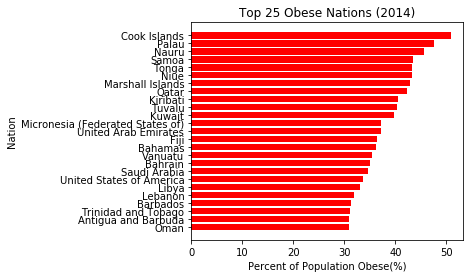

In [10]:
df1_top = df1_sorted.tail(25)

ax = plt.barh(np.arange(len(df1_top))-1, df1_top.Both, align='center', color = 'red')
plt.subplots_adjust(left=0.27)
plt.yticks(np.arange(len(df1_top))-1,df1_top.Country.values)
plt.title("Top 25 Obese Nations (2014)")
plt.xlabel("Percent of Population Obese(%)")
plt.ylabel("Nation")
plt.show()

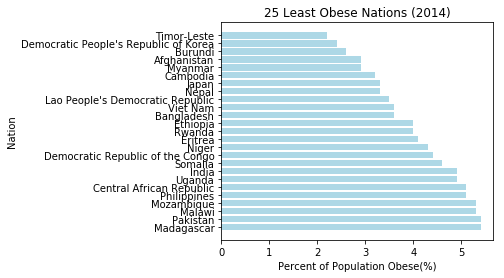

In [11]:
df1_bot = df1_sorted.head(25).sort_values(by='Both', ascending=False)
ax = plt.barh(np.arange(len(df1_bot))-1, df1_bot.Both, align='center', color='lightblue')
plt.subplots_adjust(left=0.27)
plt.yticks(np.arange(len(df1_bot))-1,df1_bot.Country.values)
plt.title("25 Least Obese Nations (2014)")
plt.xlabel("Percent of Population Obese(%)")
plt.ylabel("Nation")
plt.show()

## Dataset2 : Life expectancy by nations

This data shows world life expectancy in age  

In [12]:
# Data from https://www.kaggle.com/kumarajarshi/life-expectancy-who

df2 = pd.read_csv('Life_Expectancy_Data.csv')

In [13]:
df2.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [14]:
df2.shape

(2938, 22)

In [15]:
df2.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [17]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


** Columns explanation

* Country: Country
* Year: Year
* Status: Developed or Developing status
* Life expectancy: Life Expectancy in age
* Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths: Number of Infant Deaths per 1000 population
* Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles: Measles - number of reported cases per 1000 population
* BMI: Average Body Mass Index of entire population
* under-five deaths: Number of under-five deaths per 1000 population
* Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
* GDP: Gross Domestic Product per capita (in USD)
* Population: Population of the country
* thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling: Number of years of Schooling(years)


In [18]:
df2.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In order to merge with dataset1(obesity rate in 2014), filter the dataset2 based on a year of 2014

In [19]:
df2 = df2[df2.Year == 2014]
df2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
49,Angola,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,...,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
81,Argentina,2014,Developing,76.2,118.0,8,7.93,847.371746,94.0,1,...,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3
97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.363050,91.0,340,...,92.0,9.42,92.0,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
129,Austria,2014,Developed,81.4,66.0,0,12.32,8350.193523,98.0,117,...,98.0,11.21,98.0,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
145,Azerbaijan,2014,Developing,72.5,119.0,5,0.01,306.182431,94.0,0,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2


In [20]:
df2.shape

(183, 22)

In [21]:
# Check the duplicates for country
len(df2.Country.unique())

183

In [22]:
df2.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                              False
Total expenditure                   True
Diphtheria                         False
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

## Merge two datasets

Let's find out the country list of two datasets

In [23]:
# Check the country list of dataset1 that are not in the country list of dataset2

df1_country_list = list(df1.Country.unique())
df2_country_list = list(df2.Country.unique())

DNM_country = []

for country in df1_country_list:
    if country not in df2_country_list:
        DNM_country.append(country)
        
DNM_country



['Andorra',
 "Cote d'Ivoire",
 'Cook Islands',
 'Czech Republic',
 'Dominica',
 'Marshall Islands',
 'Nauru',
 'Niue',
 'Palau',
 'Saint Kitts and Nevis',
 'Tuvalu']

In [24]:
# Check the country list of dataset2 that are not in the country list of dataset1


DNM_country2 = []

for country in df2_country_list:
    if country not in df1_country_list:
        DNM_country2.append(country)
        
DNM_country2

["Côte d'Ivoire", 'Czechia']

##### MERGE!

In [25]:
mer_df = df1.merge(df2, how = 'inner', left_on = 'Country', right_on = 'Country')
pd.set_option('display.max_columns', 100)
mer_df

,Country,Both,Female,Male,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2.9,4.1,1.8,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Albania,17.6,18.7,16.5,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Algeria,24.8,30.8,18.8,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
3,Angola,10.2,14.2,6.0,2014,Developing,51.7,348.0,67,8.33,23.965612,64.0,11699,22.7,101,68.0,3.31,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
4,Antigua and Barbuda,30.9,38.7,22.8,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,47.0,0,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
5,Argentina,26.3,28.9,23.6,2014,Developing,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,9,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3
6,Armenia,19.5,22.0,17.2,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,54.1,1,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
7,Australia,28.6,28.8,28.4,2014,Developed,82.7,6.0,1,9.71,10769.363050,91.0,340,66.1,1,92.0,9.42,92.0,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
8,Austria,18.4,16.3,20.5,2014,Developed,81.4,66.0,0,12.32,8350.193523,98.0,117,57.1,0,98.0,11.21,98.0,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
9,Azerbaijan,22.5,26.1,19.0,2014,Developing,72.5,119.0,5,0.01,306.182431,94.0,0,51.5,6,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2


In [26]:
mer_df.columns

Index(['Country', 'Both', ' Female', ' Male', 'Year', 'Status',
       'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
# rename the columns having errant spaces
mer_df = mer_df.rename(columns={mer_df.columns[2]:'Female'})
mer_df = mer_df.rename(columns={mer_df.columns[3]:'Male'})
mer_df = mer_df.rename(columns={mer_df.columns[6]:'Life expectancy'})
mer_df = mer_df.rename(columns={mer_df.columns[12]:'Measles'})
mer_df = mer_df.rename(columns={mer_df.columns[13]:'BMI'})
mer_df = mer_df.rename(columns={mer_df.columns[14]:'under-five deaths'})
mer_df = mer_df.rename(columns={mer_df.columns[17]:'Diphtheria'})
mer_df = mer_df.rename(columns={mer_df.columns[18]:'HIV/AIDS'})
mer_df = mer_df.rename(columns={mer_df.columns[21]:'thinness  1-19 years'})
mer_df = mer_df.rename(columns={mer_df.columns[22]:'thinness  5-9 years'})

mer_df.columns

Index(['Country', 'Both', 'Female', 'Male', 'Year', 'Status',
       'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness  5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')



Let's select columns I am interested in

In [28]:
df = mer_df[['Country', 'Both', 'Female', 'Male', 'Year', 'Status', \
       'Life expectancy', 'Alcohol', 'percentage expenditure','BMI', \
       'under-five deaths', 'Total expenditure', \
       'GDP', 'Population', 'thinness  1-19 years', \
       'thinness  5-9 years', 'Income composition of resources', 'Schooling']]
df

,Country,Both,Female,Male,Year,Status,Life expectancy,Alcohol,percentage expenditure,BMI,under-five deaths,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2.9,4.1,1.8,2014,Developing,59.9,0.01,73.523582,18.6,86,8.18,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Albania,17.6,18.7,16.5,2014,Developing,77.5,4.51,428.749067,57.2,1,5.88,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Algeria,24.8,30.8,18.8,2014,Developing,75.4,0.01,54.237318,58.4,24,7.21,547.851700,39113313.0,6.0,5.8,0.741,14.4
3,Angola,10.2,14.2,6.0,2014,Developing,51.7,8.33,23.965612,22.7,101,3.31,479.312240,2692466.0,8.5,8.3,0.527,11.4
4,Antigua and Barbuda,30.9,38.7,22.8,2014,Developing,76.2,8.56,2422.999774,47.0,0,5.54,12888.296670,NaN,3.3,3.3,0.782,13.9
5,Argentina,26.3,28.9,23.6,2014,Developing,76.2,7.93,847.371746,62.2,9,4.79,12245.256450,42981515.0,1.0,0.9,0.825,17.3
6,Armenia,19.5,22.0,17.2,2014,Developing,74.6,3.91,295.608714,54.1,1,4.48,3994.712355,29622.0,2.1,2.1,0.739,12.7
7,Australia,28.6,28.8,28.4,2014,Developed,82.7,9.71,10769.363050,66.1,1,9.42,62214.691200,2346694.0,0.6,0.6,0.936,20.4
8,Austria,18.4,16.3,20.5,2014,Developed,81.4,12.32,8350.193523,57.1,0,11.21,51322.639970,8541575.0,1.8,2.0,0.892,15.9
9,Azerbaijan,22.5,26.1,19.0,2014,Developing,72.5,0.01,306.182431,51.5,6,6.40,7891.299776,953579.0,2.8,2.9,0.752,12.2


In [29]:
df.shape

(181, 18)

In [30]:
df.isna().any()

Country                            False
Both                               False
Female                             False
Male                               False
Year                               False
Status                             False
Life expectancy                    False
Alcohol                             True
percentage expenditure             False
BMI                                 True
under-five deaths                  False
Total expenditure                   True
GDP                                 True
Population                          True
thinness  1-19 years                True
thinness  5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

In [31]:
df.corr()

,Both,Female,Male,Year,Life expectancy,Alcohol,percentage expenditure,BMI,under-five deaths,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Both,1.000000,0.971240,0.960844,NaN,0.498570,0.344024,0.165397,0.654035,-0.288488,0.196579,0.304059,-0.161931,-0.508402,-0.556909,0.605991,0.521417
Female,0.971240,1.000000,0.868998,NaN,0.343853,0.223215,0.048243,0.578170,-0.266691,0.137699,0.179716,-0.164756,-0.418763,-0.468948,0.451065,0.371918
Male,0.960844,0.868998,1.000000,NaN,0.637739,0.441690,0.294546,0.689744,-0.287539,0.233413,0.440499,-0.143102,-0.560150,-0.602994,0.737274,0.646195
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,0.498570,0.343853,0.637739,NaN,1.000000,0.520402,0.402311,0.478091,-0.259804,0.313876,0.464897,-0.043577,-0.466207,-0.491203,0.894954,0.807640
Alcohol,0.344024,0.223215,0.441690,NaN,0.520402,1.000000,0.387757,0.372999,-0.124293,0.320110,0.372183,0.002107,-0.402062,-0.410426,0.581368,0.578886
percentage expenditure,0.165397,0.048243,0.294546,NaN,0.402311,0.387757,1.000000,0.134964,-0.099049,0.165843,0.908543,-0.039877,-0.242199,-0.253198,0.448700,0.393624
BMI,0.654035,0.578170,0.689744,NaN,0.478091,0.372999,0.134964,1.000000,-0.224760,0.183130,0.205705,-0.116231,-0.499683,-0.530716,0.541094,0.477408
under-five deaths,-0.288488,-0.266691,-0.287539,NaN,-0.259804,-0.124293,-0.099049,-0.224760,1.000000,-0.135079,-0.119525,0.808547,0.447599,0.516592,-0.226938,-0.222634
Total expenditure,0.196579,0.137699,0.233413,NaN,0.313876,0.320110,0.165843,0.183130,-0.135079,1.000000,0.084956,-0.073945,-0.258132,-0.289555,0.237140,0.295378


###### Let's plot the correlation between each column

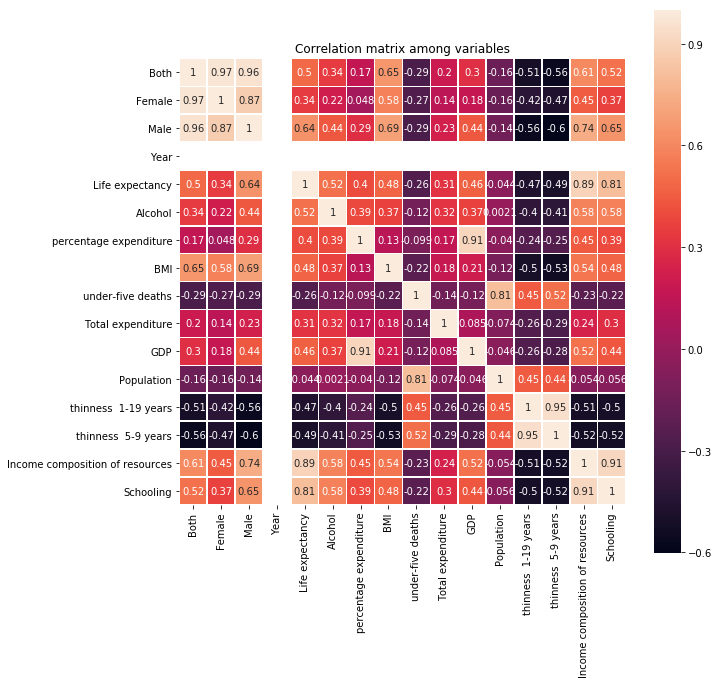

In [32]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

### 1. Let's see the relationship between 'Obesity rate' and 'Life expectancy'

In [33]:
mydf = df.copy()
mydf['Obesity rate'] = pd.cut(mydf.Both, bins = [0,10,20,30,40,100])
mydf.head()

,Country,Both,Female,Male,Year,Status,Life expectancy,Alcohol,percentage expenditure,BMI,under-five deaths,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Obesity rate
0,Afghanistan,2.9,4.1,1.8,2014,Developing,59.9,0.01,73.523582,18.6,86,8.18,612.696514,327582.0,17.5,17.5,0.476,10.0,"(0, 10]"
1,Albania,17.6,18.7,16.5,2014,Developing,77.5,4.51,428.749067,57.2,1,5.88,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(10, 20]"
2,Algeria,24.8,30.8,18.8,2014,Developing,75.4,0.01,54.237318,58.4,24,7.21,547.851700,39113313.0,6.0,5.8,0.741,14.4,"(20, 30]"
3,Angola,10.2,14.2,6.0,2014,Developing,51.7,8.33,23.965612,22.7,101,3.31,479.312240,2692466.0,8.5,8.3,0.527,11.4,"(10, 20]"
4,Antigua and Barbuda,30.9,38.7,22.8,2014,Developing,76.2,8.56,2422.999774,47.0,0,5.54,12888.296670,NaN,3.3,3.3,0.782,13.9,"(30, 40]"


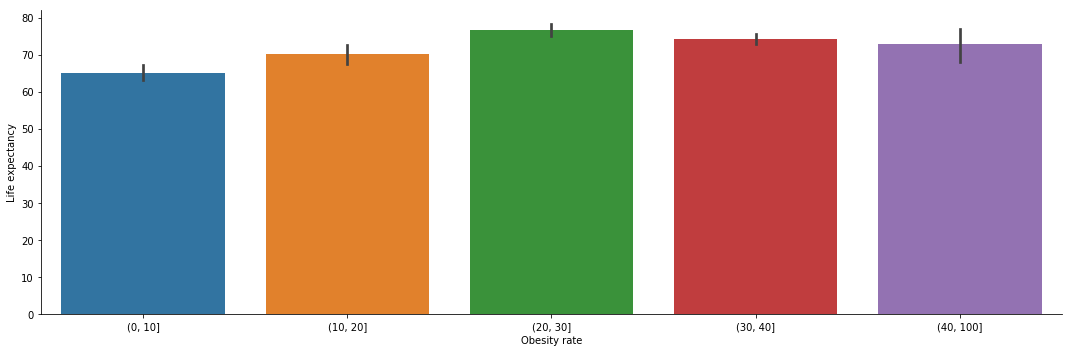

In [34]:
sns.catplot(x='Obesity rate',y='Life expectancy', data = mydf, kind='bar', aspect=3)

The graph above shows that there is a mere correlation between obesity rate and life expectancy

However, I want to classify this graph into developing country and developed country

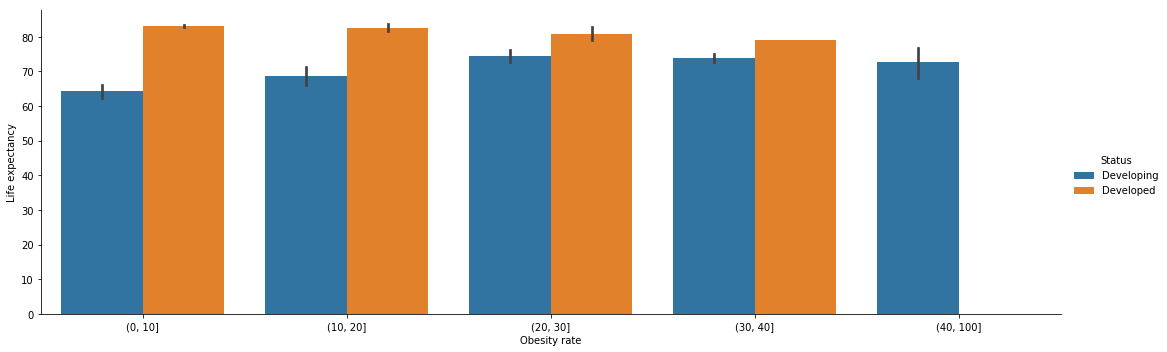

In [35]:
sns.catplot(x='Obesity rate',y='Life expectancy', hue='Status', data = mydf, kind='bar', aspect=3)

As we can see, in developed countries, the less obesity rate they have, the longer they live

### 2. Now, let's find out the correlation between obesity rate and Human Development Index(HDI)

*The Human Development Index(HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living.

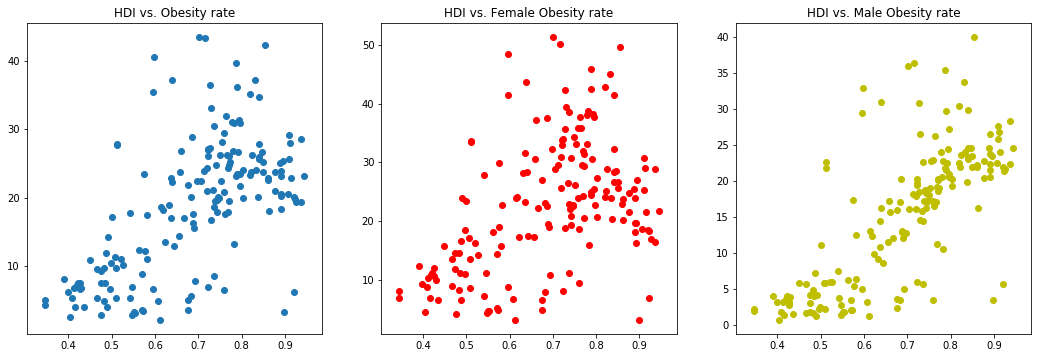

In [36]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(mydf['Income composition of resources'], mydf.Both)
plt.title("HDI vs. Obesity rate")

plt.subplot(6,3,2)
plt.scatter(mydf['Income composition of resources'],mydf.Female, color = 'r')
plt.title("HDI vs. Female Obesity rate")

plt.subplot(6,3,3)
plt.scatter(mydf['Income composition of resources'],mydf.Male, color = 'y')
plt.title("HDI vs. Male Obesity rate")

plt.show()

I can see that people obesity rate is highly correlated with HDI, especially for male.

### 3. Let's see what happens to obesity rates according to the total expenditure rate for health. Let's build and fit our linear model

*Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)

In [37]:
LRdf = mydf.copy().dropna()  # If there is missing observation or empty, delete it

linear_reg = LinearRegression()
x = LRdf['Total expenditure'].values.reshape(-1,1)
y = LRdf['Both'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# y = b0 + b1 * x (linear regression model)

b0 = linear_reg.predict(([[100]]))     
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[80.56480408]]
b1:  [[0.67010068]]


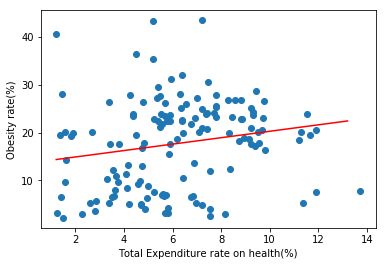

Mean Absolute Error:  11.176161587050728
Mean Squared Error:  126.43025763896618
Root Mean Squared Error:  11.244121025627845


In [39]:
x_array = np.arange(min(LRdf['Total expenditure']), \
                    max(LRdf['Total expenditure'])).reshape(-1,1)   # information about the line to be drawn
plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 
plt.plot(x_array, y_head, color="red")
plt.xlabel("Total Expenditure rate on health(%)")
plt.ylabel("Obesity rate(%)")

plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [40]:
print(r2_score(y, linear_reg.predict(x)))

0.03606418772108333


##### ** Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor  # for our predict model

In [42]:
DTdf = mydf.copy().dropna() # If there is missing observation or empty, delete it

In [43]:
x2 = DTdf.GDP.values.reshape(-1,1)
y2 = DTdf.Both.values.reshape(-1,1)

In [44]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state= 42)

In [45]:
DT_reg = DecisionTreeRegressor()           # model created
DT_reg.fit(x2_train,y2_train)               # train values fit to the model

print(DT_reg.predict([[100]]))    # Obesity rate estimation of the country with 100 GDP value

[13.6]


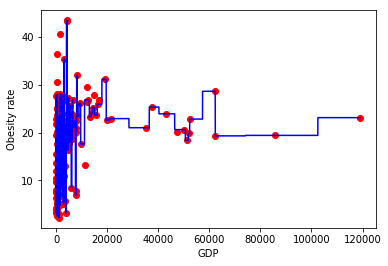

In [46]:
x2_array = np.arange(min(x2),max(x2),0.01).reshape(-1,1)   # correct information to draw the forecast
y2_head = DT_reg.predict(x2_array)                        # percent spend estimate

plt.scatter(x2, y2, color="red")
plt.plot(x2_array, y2_head, color="blue")
plt.xlabel("GDP")
plt.ylabel("Obesity rate")
plt.show()